# how well does RNAseq data correlated with real secretome
We happen to have a data with MSC proteoma

In [3]:
import pandas as pd
msc_secretome = pd.read_excel('/home/hsher/c2c_input/1-s2.0-S1570963919300263-mmc2.xlsx', header = 1)

In [4]:
msc_secretome.head()

,Protein IDs,Gene name,Protein names,Signal peptide,Peptides,Razor + unique peptides,Unique peptides,Sequence coverage [%],Molecular weight,Q-value,Score,Norm. main Intensity
0,P43235,CTSK,Cathepsin K,x,2,2,2,12.2,36.966,0.000521,4.8803,2102400
1,P09871,C1S,Complement C1s subcomponent;Complement C1s sub...,x,28,28,28,52.9,76.684,0.000000,323.3100,2483500000
2,P07602,PSAP,Prosaposin;Saposin-A;Saposin-B-Val;Saposin-B;S...,x,9,9,9,20.4,58.112,0.000000,24.5300,108420000
3,P21810,BGN,Biglycan,x,18,17,17,55.2,41.654,0.000000,323.3100,9277000000
4,P07585,DCN,Decorin,x,19,19,18,56.0,39.746,0.000000,323.3100,10697000000


In [32]:
msc_secretome.shape

(315, 12)

In [19]:
wo_rnaseq = pd.read_excel('/home/hsher/c2c_input/wolock_mapped_matrix.xlsx', header = 0)
tik_rnaseq = pd.read_excel('/home/hsher/c2c_input/tikhonova_mapped_matrix.xlsx', header = 0)

In [9]:
wo_rnaseq.head() # cluster 1 is MSC

,Gene Symbol,7,0,3,13,10,2,9,1,15,...,20,12,11,22,19,16,18,17,21,14
0,KIAA1841,0.006439,0.006196,0.003286,0.000000,0.017271,0.019261,0.003556,0.006598,0.000000,...,0.000000,0.000000,0.003078,0.000000,0.028216,0.000000,0.020152,0.014918,0.0,0.006078
1,C17orf49,0.014462,0.005857,0.004148,0.000000,0.015742,0.013961,0.001996,0.005737,0.000000,...,0.000000,0.000000,0.003205,0.000000,0.020499,0.032827,0.000000,0.007344,0.0,0.000000
2,C2orf68,0.033234,0.023917,0.031984,0.019008,0.011045,0.044255,0.014662,0.036249,0.078438,...,0.064874,0.090720,0.032359,0.000000,0.044002,0.061848,0.000000,0.053104,0.0,0.003360
3,C4orf19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000381,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
4,C11orf58,0.271489,0.124225,0.114978,0.067668,0.094877,0.308126,0.064653,0.141941,0.035782,...,0.137201,0.155847,0.274285,0.315038,0.375025,0.051111,0.179495,0.343053,0.0,0.132710


In [22]:
wo_rnaseq.drop_duplicates(subset = 'Gene Symbol', inplace = True)
wo_rnaseq.set_index('Gene Symbol')['1']

Gene Symbol
KIAA1841    0.006598
C17orf49    0.005737
C2orf68     0.036249
C4orf19     0.000000
C11orf58    0.141941
              ...   
ND3         0.676437
ND4         1.827234
ND4L        0.150609
ND5         0.398249
ND6         0.004023
Name: 1, Length: 16480, dtype: float64

In [33]:
msc_secretome.drop_duplicates(subset = 'Gene name', inplace = True)
msc_secretome.set_index("Gene name")['Norm. main Intensity']

Gene name
CTSK           2102400
C1S         2483500000
PSAP         108420000
BGN         9277000000
DCN        10697000000
              ...     
SHROOM3      132980000
PEPD          80352000
PNP           84422000
SDCBP         31450000
COTL1        196020000
Name: Norm. main Intensity, Length: 304, dtype: int64

In [35]:
df = pd.concat([wo_rnaseq.set_index('Gene Symbol')['1'], msc_secretome.set_index("Gene name")['Norm. main Intensity']], axis = 1)

/home/hsher/miniconda3/envs/cell2cell/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'proteomic intensity')

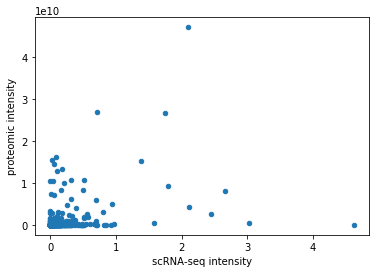

In [39]:
ax = df.plot(kind = 'scatter', x = '1', y = 'Norm. main Intensity')
ax.set_xlabel("scRNA-seq intensity")
ax.set_ylabel("proteomic intensity")